In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
data=load_boston()
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,train_size=0.8,random_state=000)
clf=GradientBoostingRegressor(n_estimators=500,learning_rate=0.01,max_depth=3,min_samples_split=2,random_state=000)
clf.fit(x_train,y_train)
y_pre=clf.predict(x_test)
mean_squared_error(y_pre,y_test)

18.201163636599027

In [4]:
feature=clf.feature_importances_
list(np.arange(len(data.feature_names)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

<BarContainer object of 13 artists>

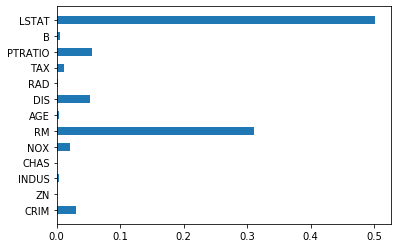

In [5]:
plt.barh(range(len(data.feature_names)),feature,height=0.5,tick_label=list(data.feature_names))


In [6]:
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve


In [7]:
train,test=make_classification(n_samples=80000,n_features=20)


In [8]:
#将数据分成训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.5)
x_trainxg,x_trainlr,y_trainxg,y_trainlr=train_test_split(x_train,y_train,test_size=0.5)

In [9]:
rf=RandomForestClassifier(max_depth=3,n_estimators=10)
rf.fit(x_trainxg,y_trainxg)
rfen=OneHotEncoder(categories='auto')
rfen.fit(rf.apply(x_trainxg))
rf_lm=LogisticRegression(solver='lbfgs',max_iter=1000)
rf_lm.fit(rfen.transform(rf.apply(x_trainlr)),y_trainlr)
y_pred_rf_lg=rf_lm.predict_proba(rfen.transform(rf.apply(x_test)))[:,1]
fp,tp,_=roc_curve(y_test,y_pred_rf_lg)

In [10]:
clf=GradientBoostingRegressor(n_estimators=50,learning_rate=0.01,max_depth=3,min_samples_split=2,random_state=000)
clf.fit(x_trainxg,y_trainxg)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
rfen.fit(clf.apply(x_trainxg))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [15]:
rf_lm.fit(rfen.transform(clf.apply(x_trainlr)),y_trainlr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pr=rf_lm.predict_proba(rfen.transform(clf.apply(x_test)))[:,1]

In [17]:
fp1,tp1,_=roc_curve(y_test,y_pr)

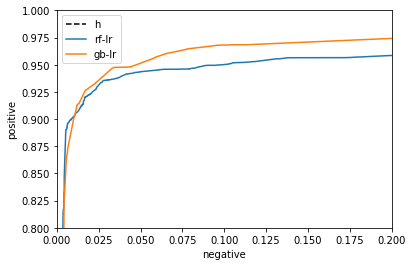

In [18]:
plt.figure(2)
plt.xlim(0,0.2)
plt.ylim(0.8,1)
plt.plot([0,1],[0,1],'k--',label='h')
plt.plot(fp,tp,label='rf-lr')
plt.plot(fp1,tp1,label='gb-lr')

plt.xlabel('negative')
plt.ylabel('positive')
plt.legend(loc='best')
